<a href="https://colab.research.google.com/github/Pippala-Rakshitha/Module-02-Project/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

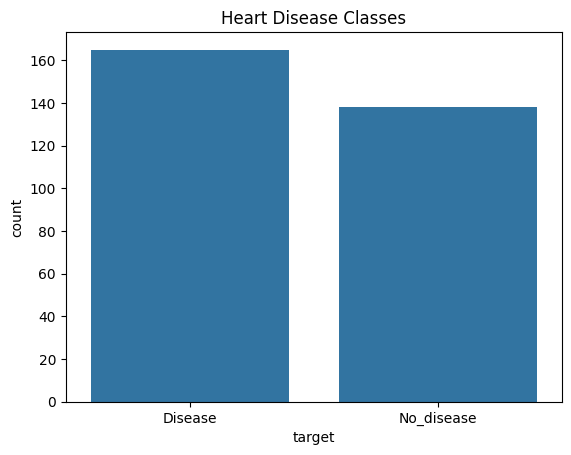

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

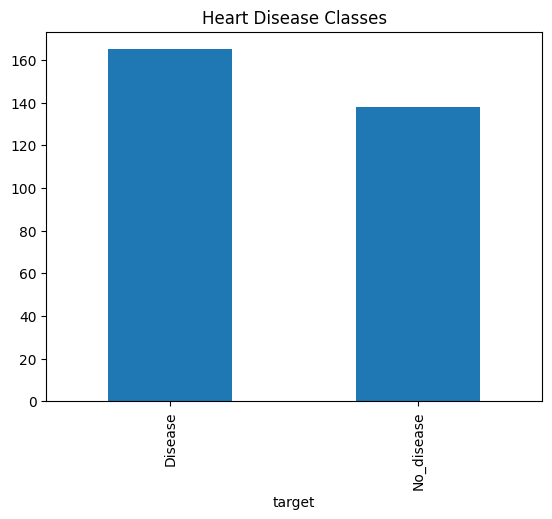

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

<ipython-input-9-f57ad03d87b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')


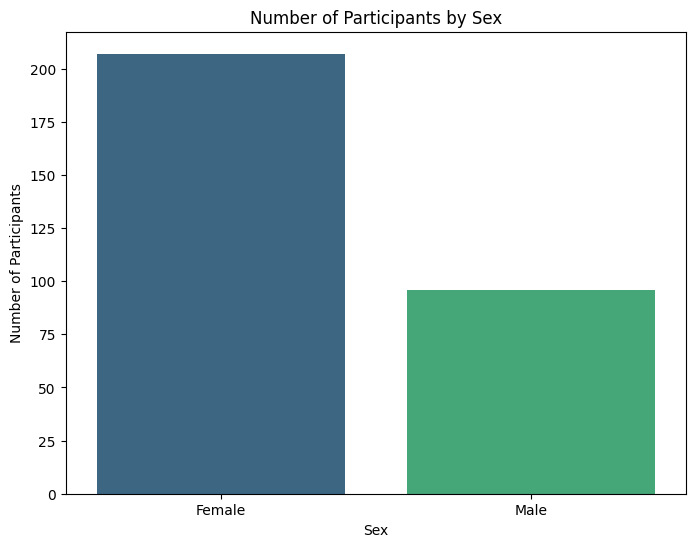

In [9]:
#todo:barplot
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of males and females
sex_counts = data['sex'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Sex')
plt.ylabel('Number of Participants')
plt.title('Number of Participants by Sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()


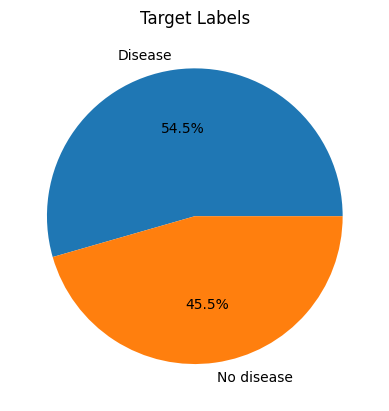

In [10]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

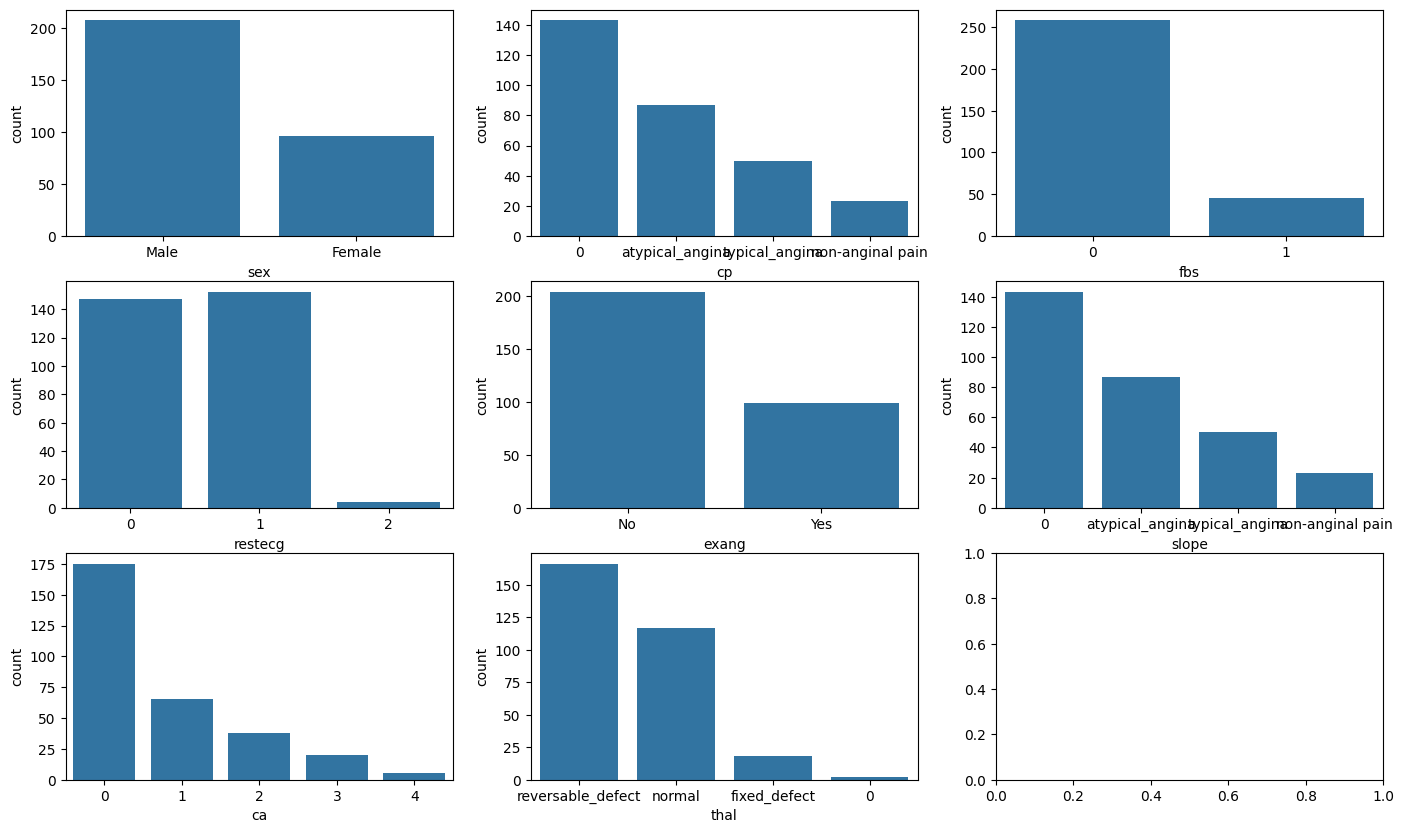

In [11]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

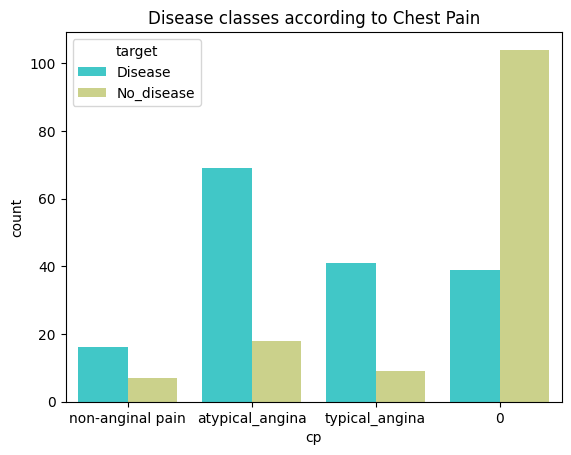

In [12]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

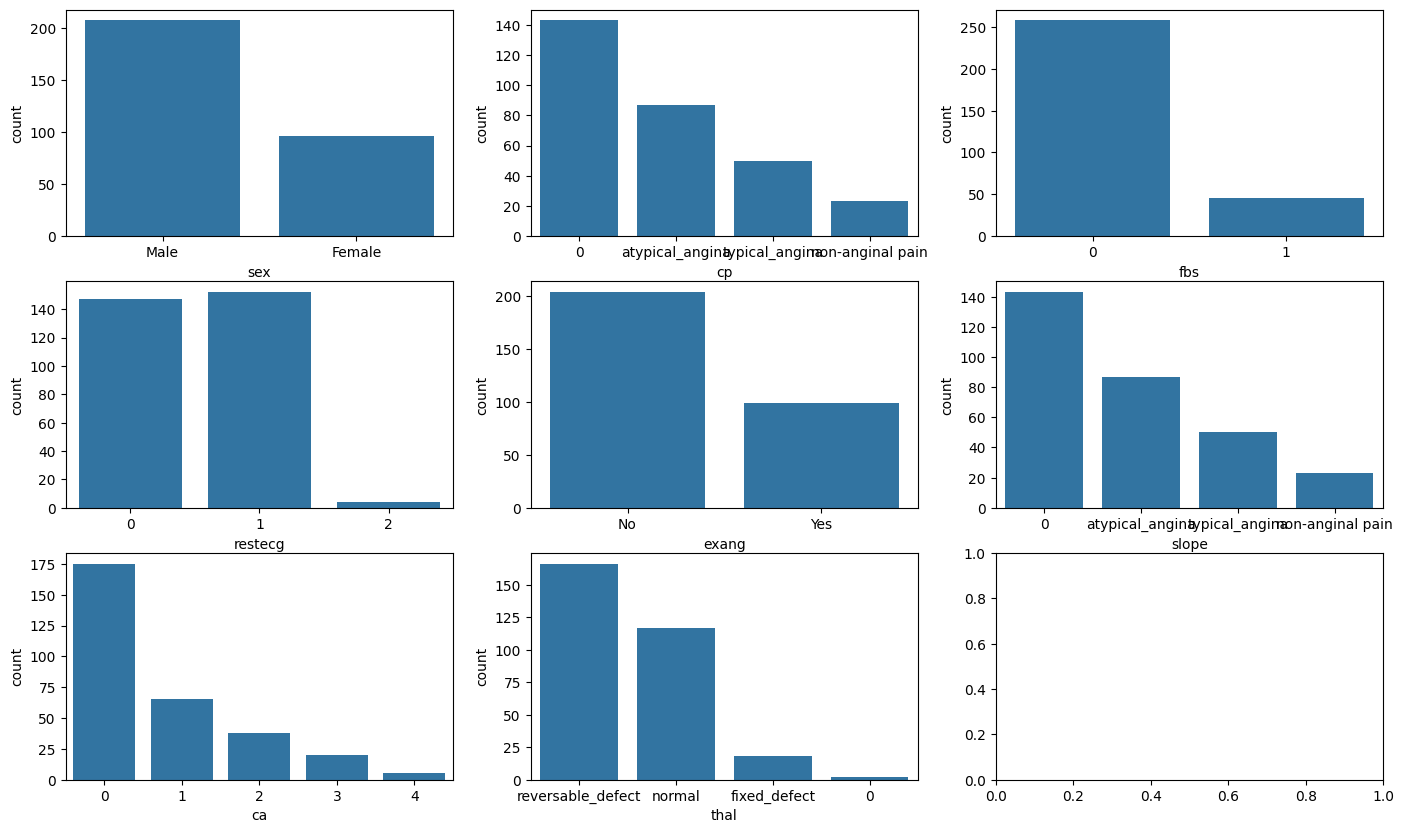

In [13]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do

    sns.barplot(data[feature].value_counts(),ax=ax)


In [ ]:
# Visualising the distribution of the continous variables

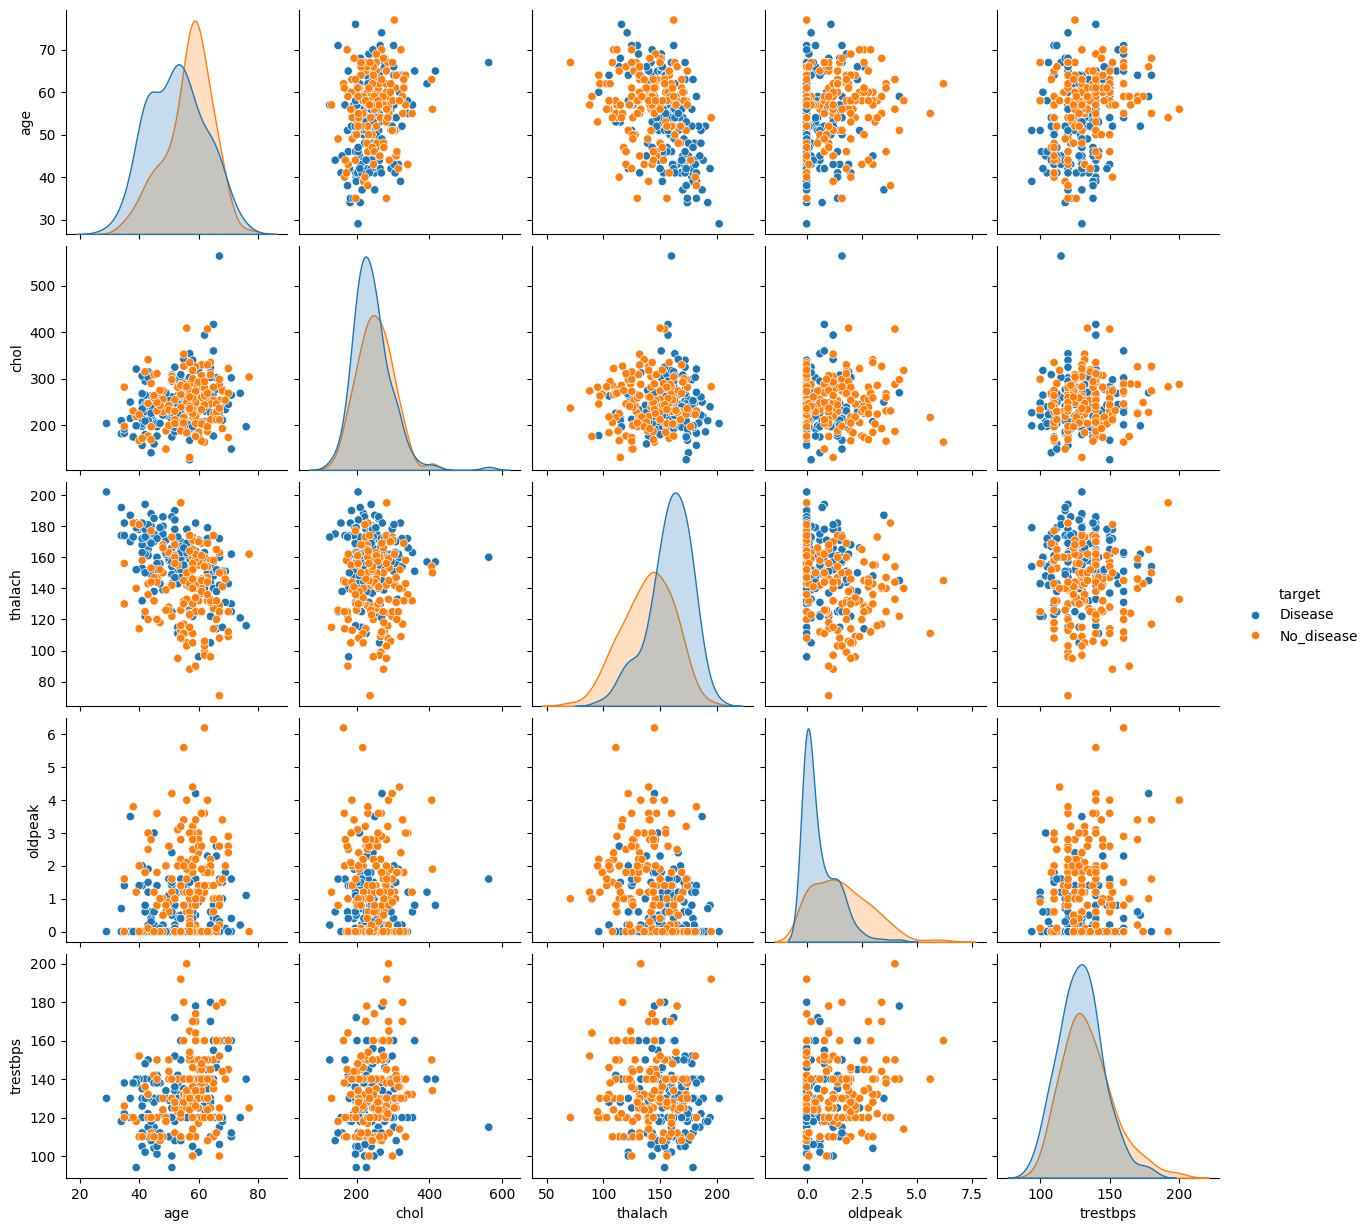

In [14]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

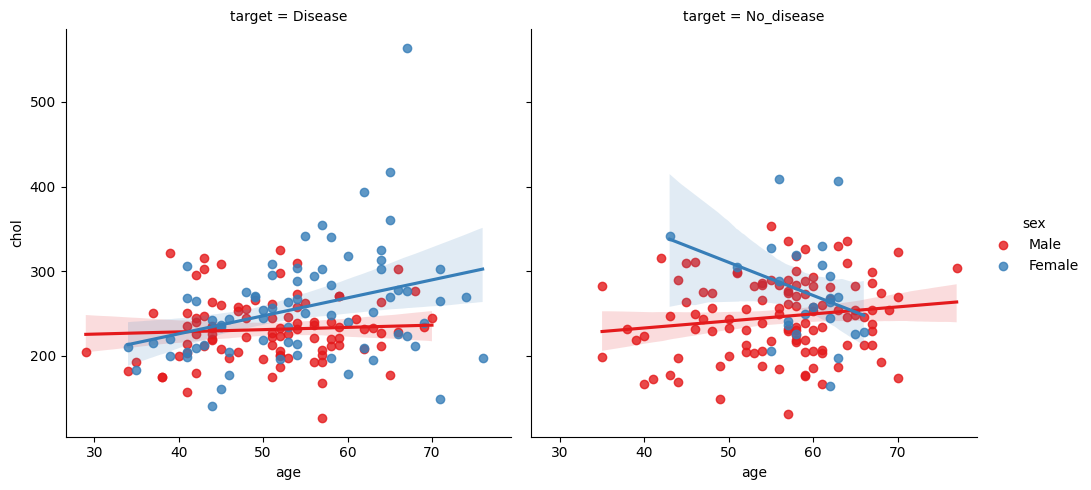

In [15]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

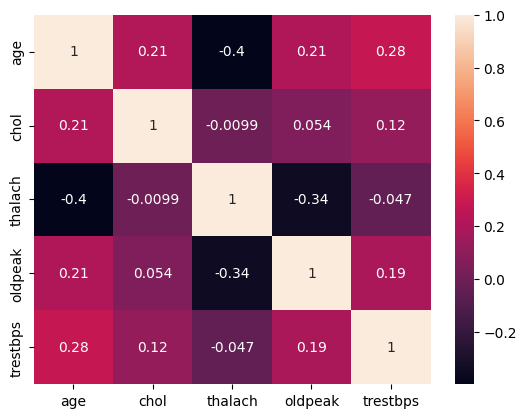

In [16]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

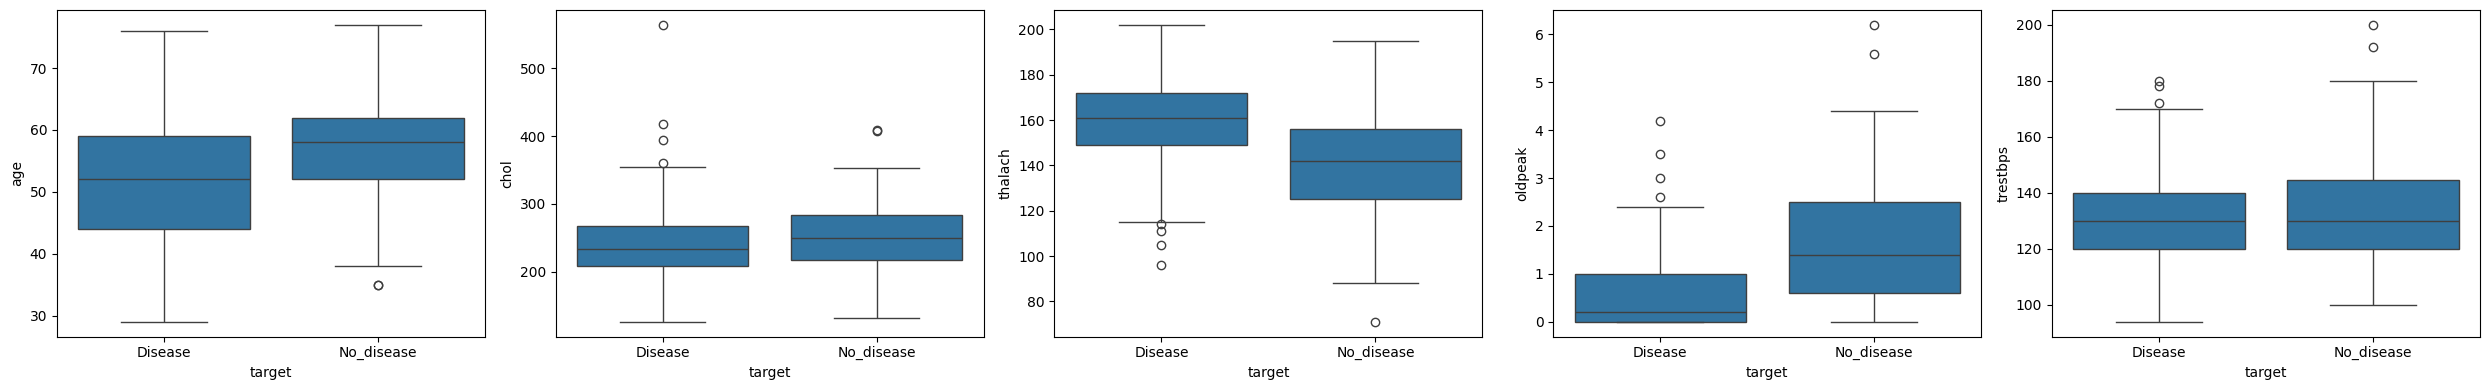

In [17]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

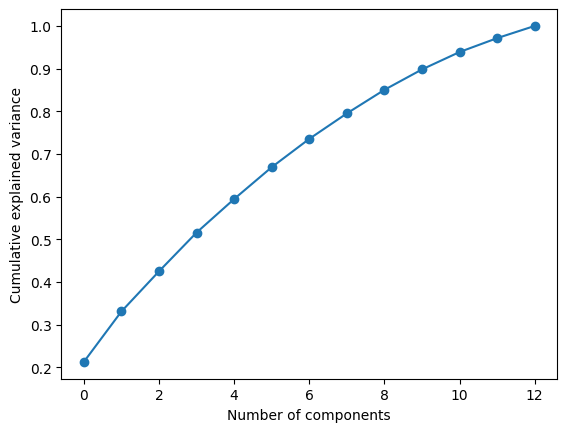

In [21]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
data = pd.read_csv('heart.csv')
numeric_data = data.drop(columns=['target'])
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)
pca = PCA()
pca.fit(numeric_data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()





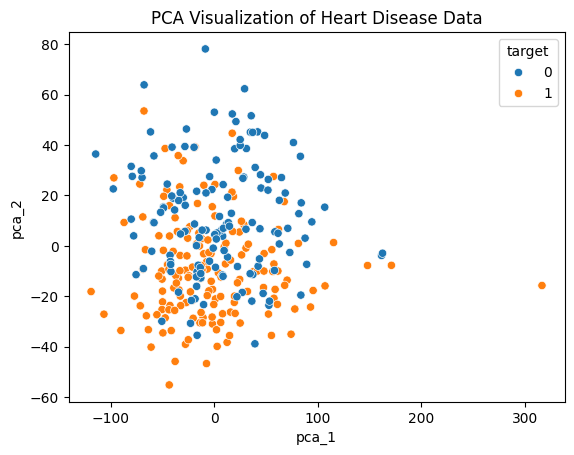

In [22]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


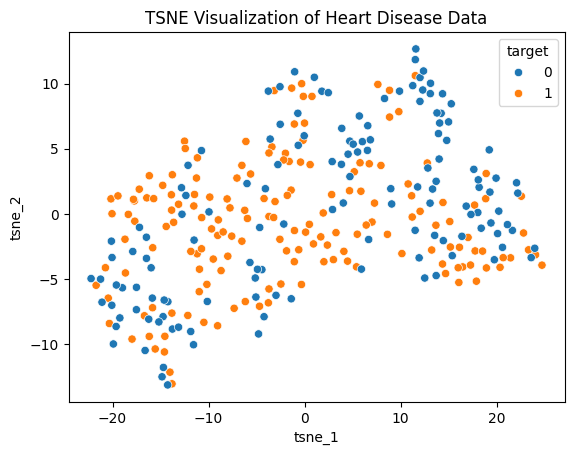

In [23]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

1.What is the percentage of Samples with Disease?




In [24]:
#1.percentage of samples with disease
import pandas as pd
data = pd.read_csv('heart.csv')
disease_percentage = data['target'].mean() * 100
print(f"The percentage of samples with disease is {disease_percentage:.2f}%")


The percentage of samples with disease is 54.46%


2.what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?


To determine which continuous features show a significant statistical difference in distribution with respect to the presence and absence of the disease, we can perform t-tests on the continuous variables.

In [26]:
#2.continous features
import pandas as pd
from scipy.stats import ttest_ind
data = pd.read_csv('heart.csv')
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
p_values = {}
for feature in continuous_features:
    disease_present = data[data['target'] == 1][feature]
    disease_absent = data[data['target'] == 0][feature]
    t_stat, p_val = ttest_ind(disease_present, disease_absent)
    p_values[feature] = p_val
sorted_p_values = sorted(p_values.items(), key=lambda item: item[1])
top_3_features = sorted_p_values[:3]
print("Top 3 continuous features with significant statistical difference in distribution:")
for feature, p_val in top_3_features:
    print(f"{feature}: p-value = {p_val:.6f}")


Top 3 continuous features with significant statistical difference in distribution:
oldpeak: p-value = 0.000000
thalach: p-value = 0.000000
age: p-value = 0.000075


3.Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    




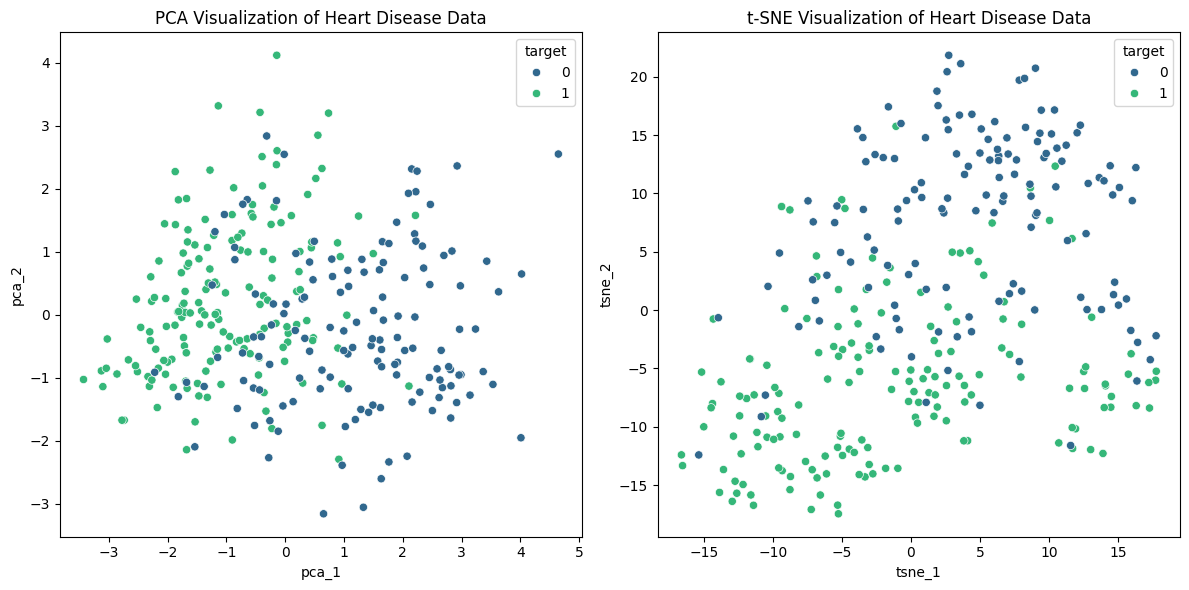

In [27]:
#3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('heart.csv')
numeric_data = data.drop(columns=['target'])
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data_scaled)
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pca_1", y="pca_2", hue="target", palette='viridis', data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(numeric_data_scaled)
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})
plt.subplot(1, 2, 2)
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", palette='viridis', data=tsne_df)
plt.title("t-SNE Visualization of Heart Disease Data")
plt.tight_layout()
plt.show()


4.What is the optimal number of principal components in our case?


Determining the optimal number of principal components can be done by examining the cumulative variance explained by the principal components. The goal is to select enough components to capture a significant portion of the variance while avoiding the inclusion of too many components, which could lead to overfitting.

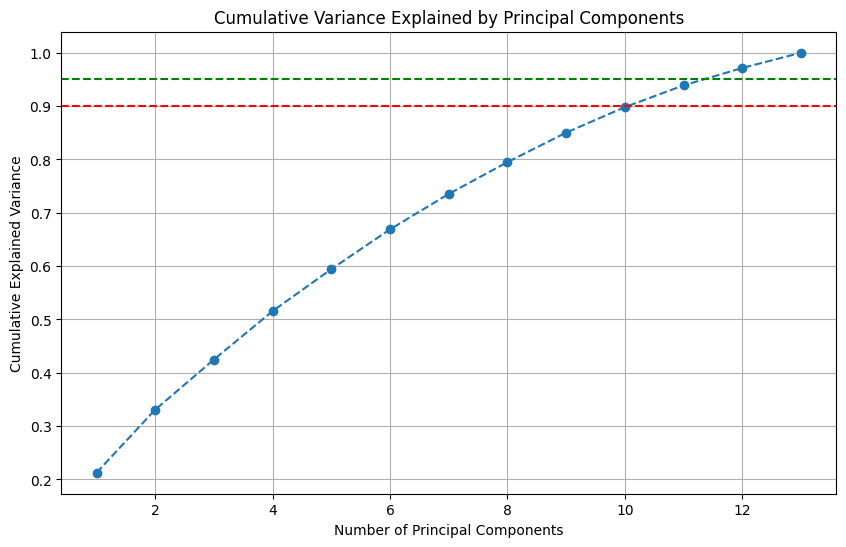

(11, 12)

In [28]:
#4.optimal number of principal components
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv('heart.csv')
numeric_data = data.drop(columns=['target'])
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)
pca = PCA()
pca.fit(numeric_data_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()
optimal_90 = next(i for i, total in enumerate(cumulative_variance, 1) if total >= 0.90)
optimal_95 = next(i for i, total in enumerate(cumulative_variance, 1) if total >= 0.95)
optimal_90, optimal_95


5.what are the continous features with the highest correation with each other?
To identify the continuous features with the highest correlation with each other, we can calculate the correlation matrix of the continuous features and then find the pairs with the highest correlation values.

In [29]:
#5.Highest correlation
import pandas as pd
import numpy as np
data = pd.read_csv('heart.csv')
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
correlation_matrix = data[continuous_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.mask(mask)
max_corr = correlation_matrix_masked.stack().idxmax()
max_corr_value = correlation_matrix_masked.stack().max()
max_corr, max_corr_value


(('trestbps', 'age'), 0.27935090656128797)

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [30]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (1).csv


In [31]:
data = pd.read_csv("star_nutri_expanded.csv")

In [32]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [33]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [34]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [35]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [37]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [38]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [39]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [40]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [41]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [42]:

data = data.replace({True: 1, False: 0})


In [43]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-43-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [44]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

In [47]:
## to do
# Create a pie chart of the 'Tea' column also write your observation form the plot

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('star_nutri_expanded.csv')
print("First few rows of the dataframe:")
print(data.head())
print("\nColumns in the dataframe:")
print(data.columns)
if 'Tea' in data.columns:
    tea_counts = data['Tea'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(tea_counts, labels=tea_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Tea Consumption Distribution')
    plt.show()
else:
    print("\n'Tea' column not found in the dataframe.")



First few rows of the dataframe:
         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0  


Explained variance ratio by each principal component:
[5.31755263e-01 2.21899440e-01 1.36222965e-01 4.47061632e-02
 3.41517036e-02 2.49811070e-02 4.87925872e-03 1.19208201e-03
 2.12017375e-04]


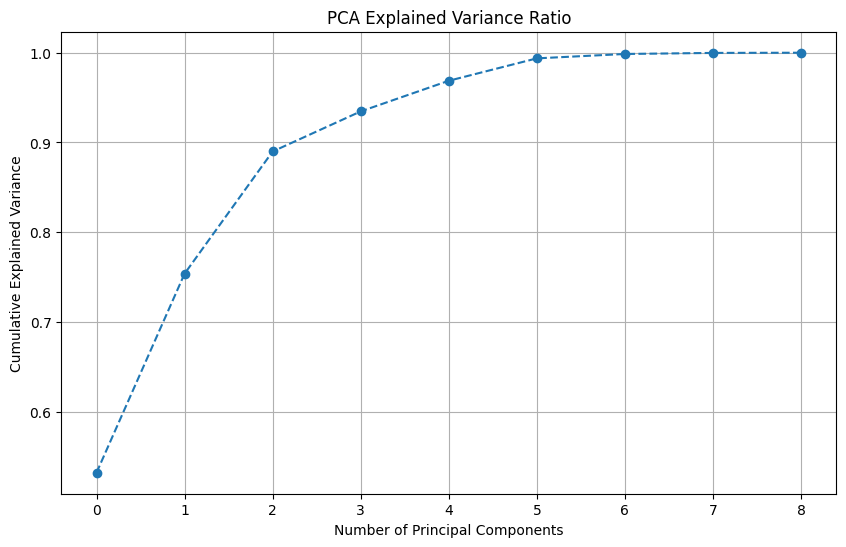


Optimal number of principal components: 5


In [50]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv('star_nutri_expanded.csv')
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained variance ratio by each principal component:")
print(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nOptimal number of principal components: {optimal_components}")


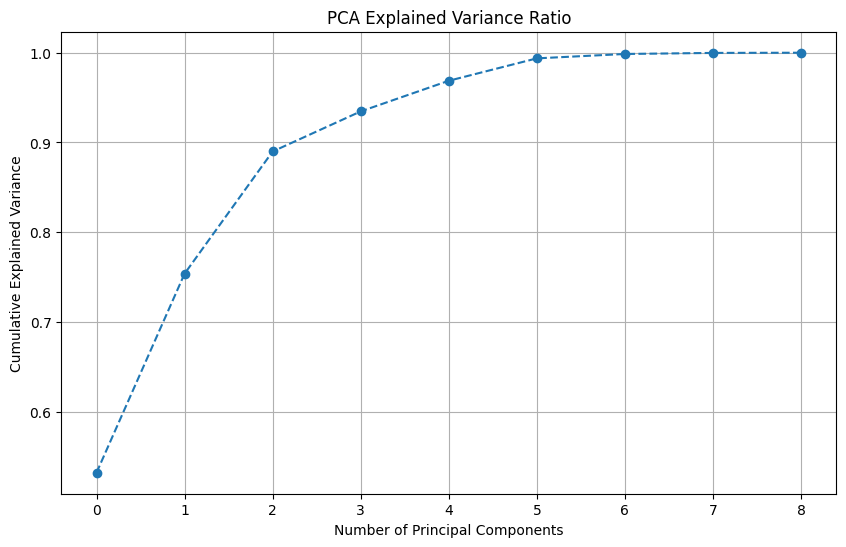


Optimal number of principal components: 5


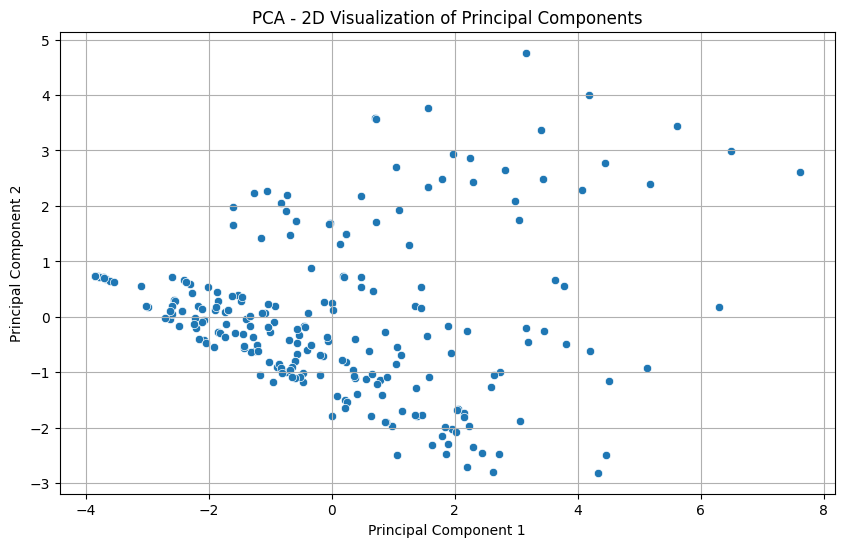

In [51]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('star_nutri_expanded.csv')
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nOptimal number of principal components: {optimal_components}")
pca_optimal = PCA(n_components=optimal_components)
principal_components = pca_optimal.fit_transform(scaled_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(optimal_components)])

# Visualize the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization of Principal Components')
plt.grid(True)
plt.show()



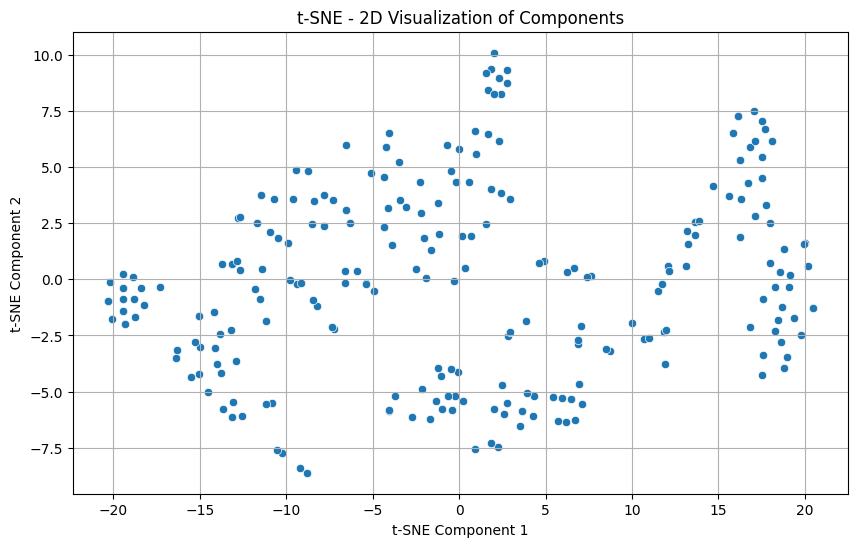

In [52]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('star_nutri_expanded.csv')
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE - 2D Visualization of Components')
plt.grid(True)
plt.show()



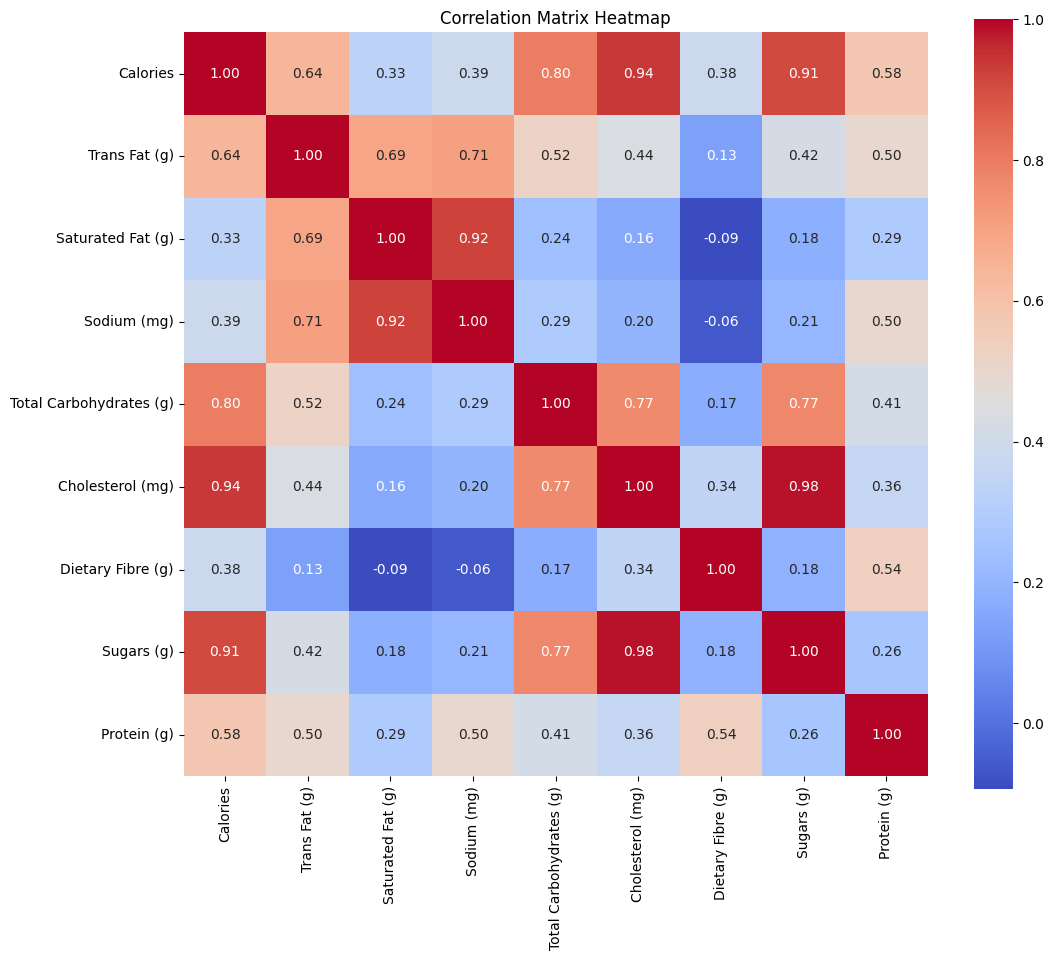

In [53]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('star_nutri_expanded.csv')
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()



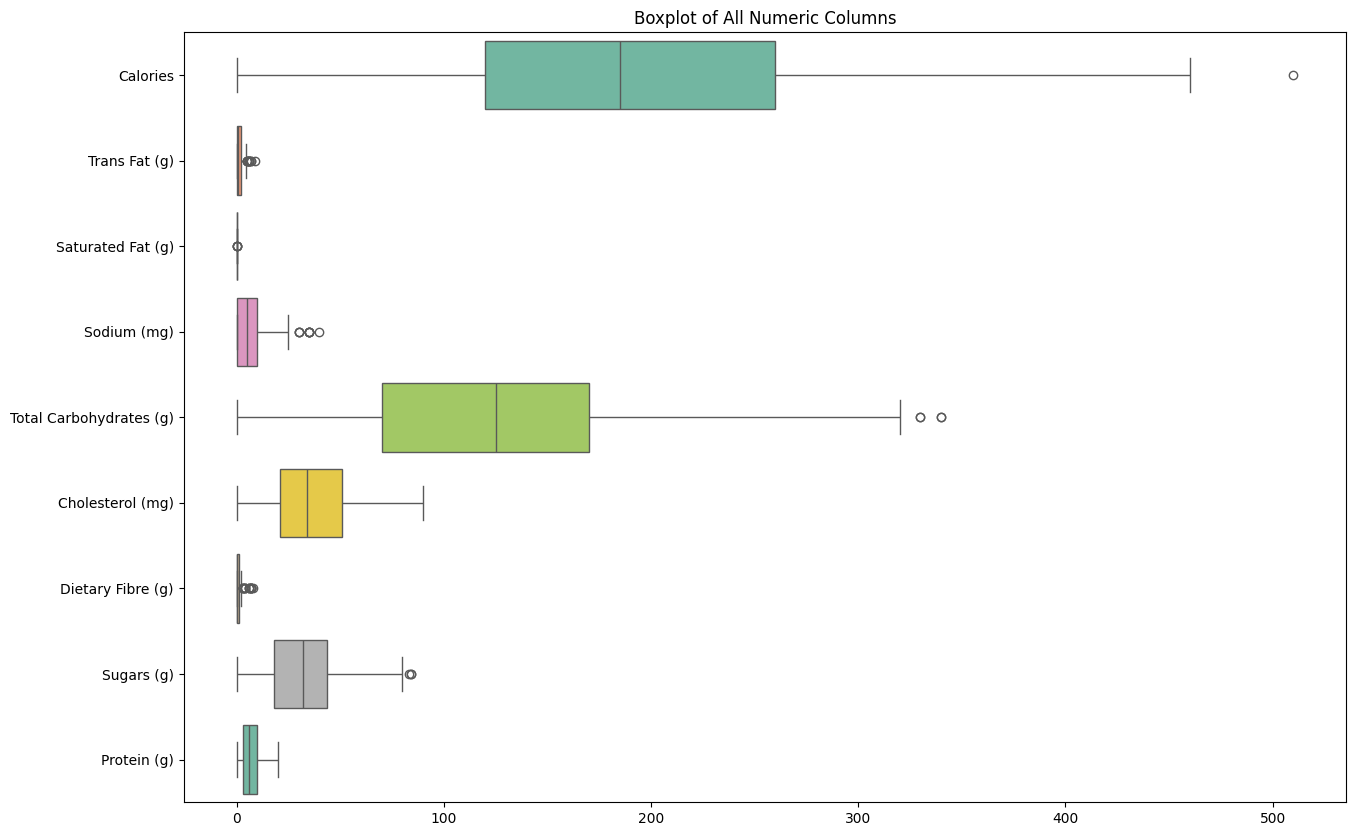


'Tea' column not found in the dataframe.


In [56]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('star_nutri_expanded.csv')
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data, orient="h", palette="Set2")
plt.title('Boxplot of All Numeric Columns')
plt.show()

if 'Tea' in data.columns:
    # Create a boxplot for each numeric column, separated by tea drinkers and non-tea drinkers
    for column in numeric_data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Tea', y=column, data=data, palette="Set2")
        plt.title(f'Boxplot of {column} by Tea Drinkers and Non-Tea Drinkers')
        plt.show()
else:
    print("\n'Tea' column not found in the dataframe.")


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.